In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt


Telecom_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv')


Lets look at the top 5 records of dataframe

In [ ]:
Telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


customerID - Customer ID

gender - Whether the customer is a male or a female

SeniorCitizen - Whether the customer is a senior citizen (1, 0)

Partner - Whether the customer has a partner (Yes, No)

Dependents - Whether the customer has dependents (Yes, No)

tenure - Number of months the customer has stayed with the company

PhoneService - Whether the customer has a phone service (Yes, No)

MultipleLines - Whether the customer has multiple lines (Yes, No, No phone service)

InternetService - Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity - Whether the customer has online security (Yes, No, No internet service)

OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection - Whether the customer has device protection (Yes, No, No internet service)

TechSupport - Whether the customer has tech support (Yes, No, No internet service)

StreamingTV - Whether the customer has streaming TV service (Yes, No, No internet service)

StreamingMovies - Whether the customer has streaming movies service (Yes, No, No internet service)

Contract - Indicates the type of the contract (Month-to-month, One year, Two year)

PaperlessBilling - Whether the customer has paperless billing (Yes, No)

PaymentMethod - Indicates the payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges - Indicates the current monthly subscription cost of the customer

TotalCharges - Indicates the total charges paid by the customer so far

Churn - Indicates whether the customer churned

Lets check the various attributes of dataframe and their datatypes

In [ ]:
Telecom_data.shape


(7043, 21)

In [ ]:
Telecom_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
Telecom_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
Telecom_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Senior Citizen is actualy categorial data hence the 25% , 50% , 75% is not proper.
75% Customer have tenure less than 55 months.
Average monthly charges are USD 64.76 Whereas 25% customers pay more than USD 89.85 per month

In [ ]:
Telecom_data['Churn'].value_counts()  #counting the target variable per category

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Counting the target variable per category')

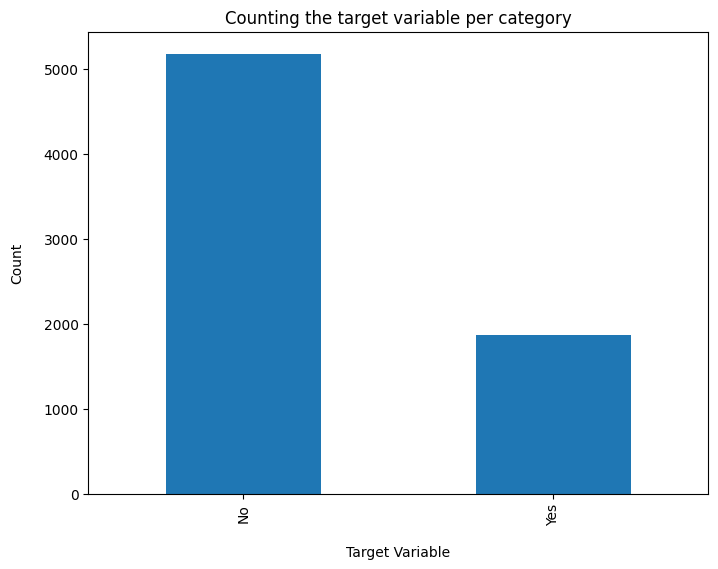

In [ ]:



Telecom_data['Churn'].value_counts().plot(kind='bar' ,figsize=(8,6))
plt.xlabel("Target Variable" , labelpad=14)
plt.ylabel("Count" , labelpad=14)
plt.title("Counting the target variable per category")

The Data is highly imbalanced.

In [ ]:
Telecom_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As we can see that there is no missing data in the dataset but We can see that the monthly charges is float datatype and total charges is object datatype. We should convert total charges to float datatype and check if that colums really don't have any missing data

In [ ]:
data_frame = Telecom_data.copy()  #Create a copy of data base for processing
#Total charges should be numeric
data_frame.TotalCharges = pd.to_numeric(data_frame.TotalCharges , errors='coerce')
data_frame.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now we can see that Total charges attribute has 11 missing values. As there are only 11 rows missing i have decided to ignore this row.

In [ ]:
data_frame.dropna(how='any' , inplace= True)
data_frame.shape

(7032, 21)

In [ ]:
#Get the max tenure
print(data_frame['tenure'].max())



72


In [ ]:
#group the tenure in bins of 12 months
labels =["{0}-{1}".format(i, i + 11) for i in range(1 , 72 , 12) ]
data_frame['tenure_group'] = pd.cut(data_frame.tenure , range(1 , 80 , 12) , right=False , labels=labels)
data_frame['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

In [ ]:
data_frame.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [ ]:
# Remove coloums not required for processing
data_frame.drop(columns=['customerID' , 'tenure'] , axis=1 , inplace=True)



Univariate Analysis

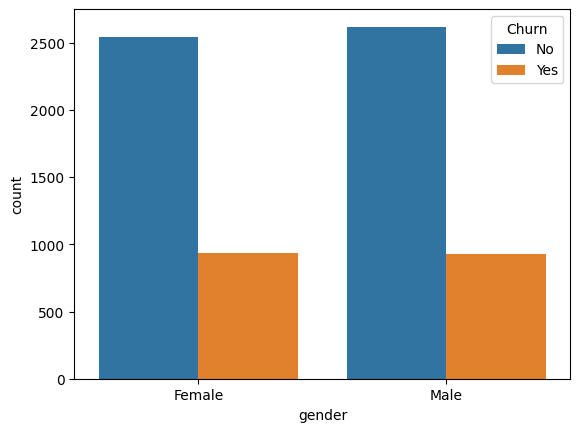

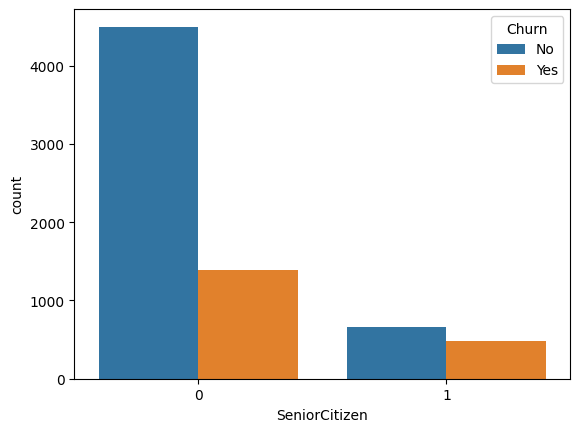

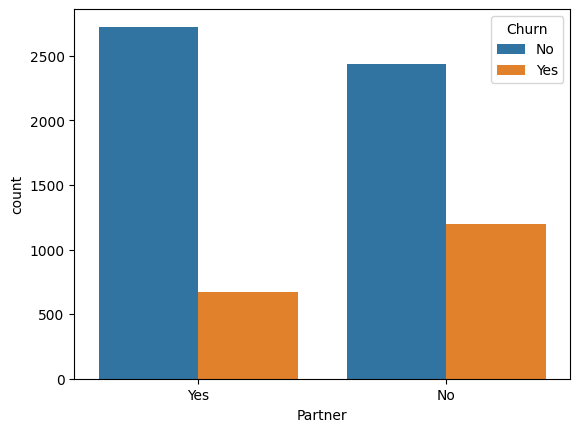

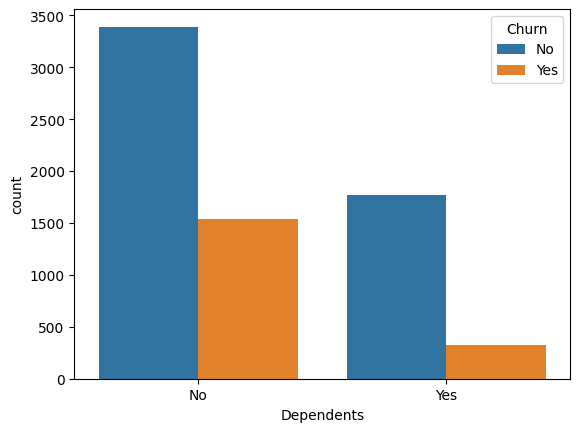

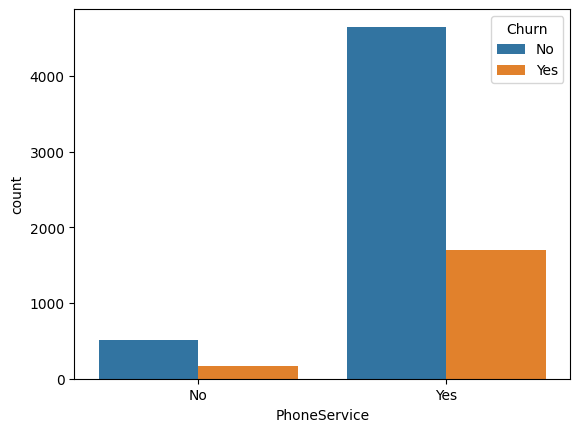

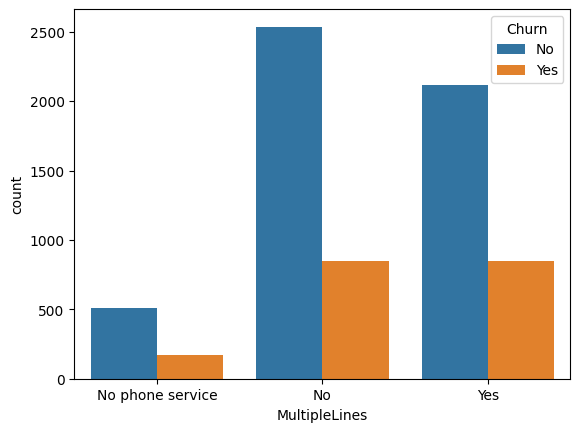

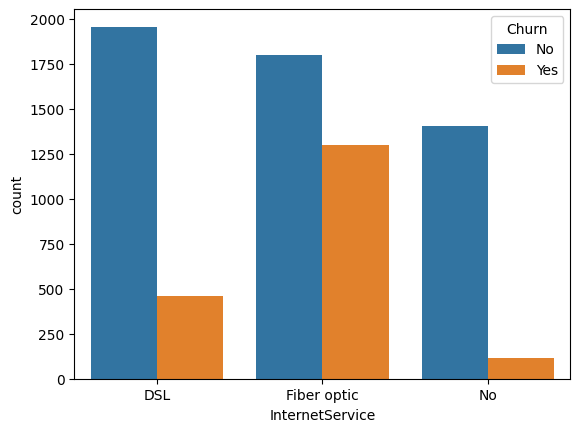

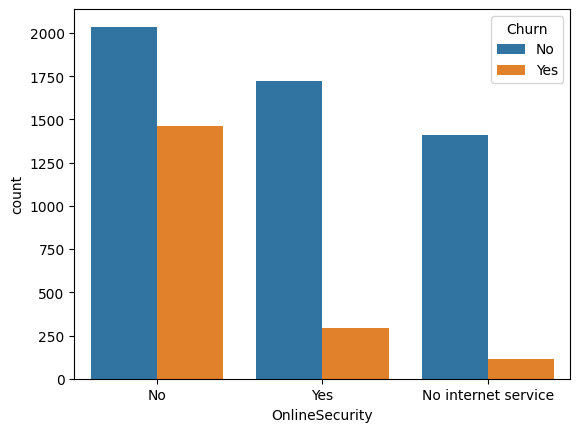

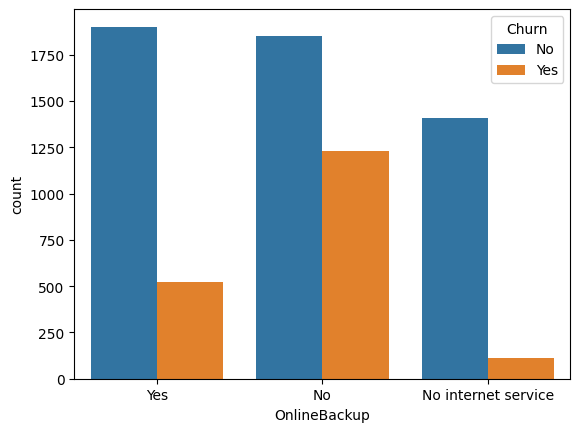

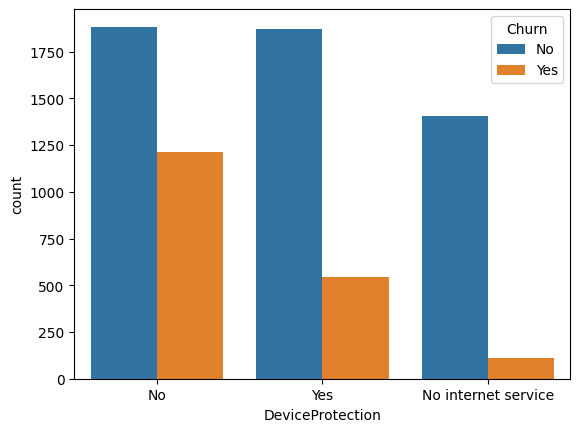

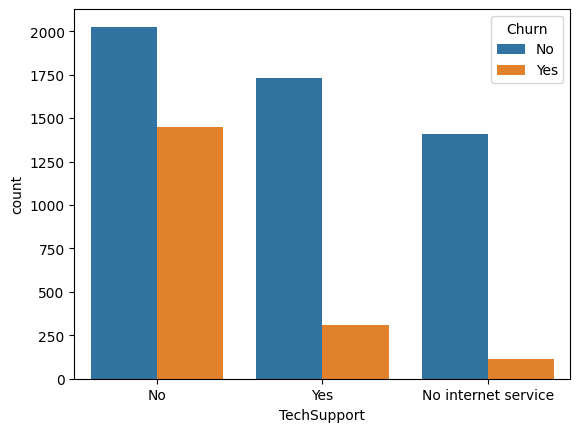

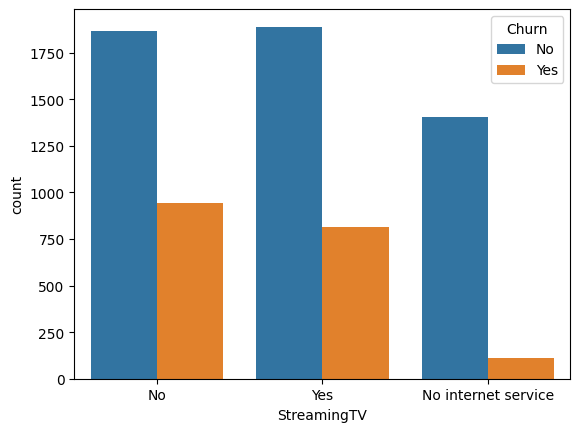

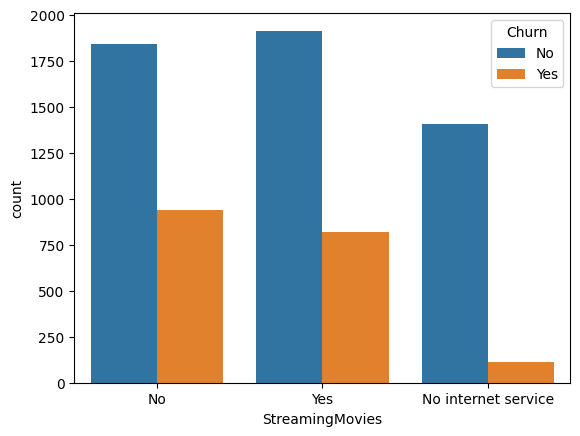

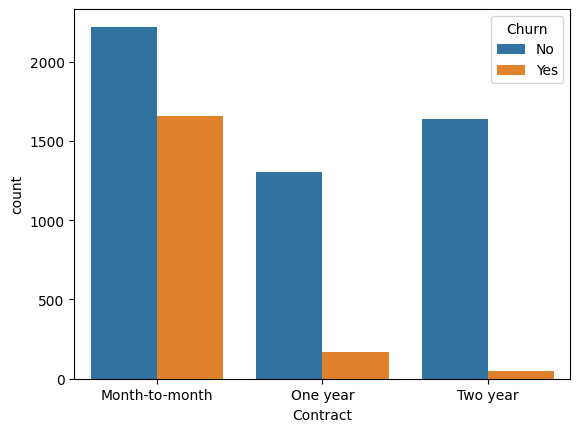

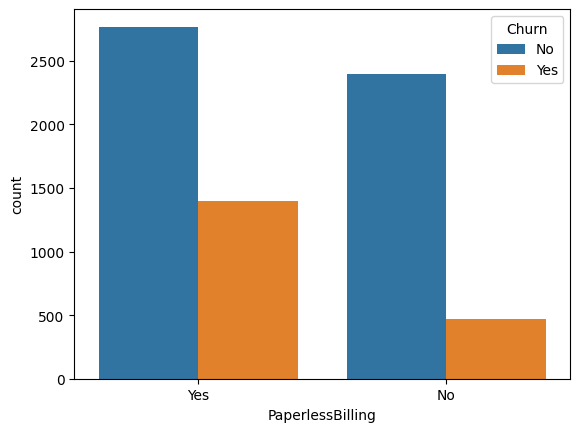

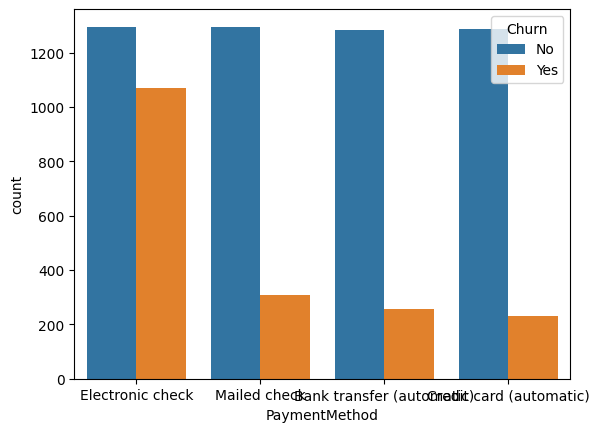

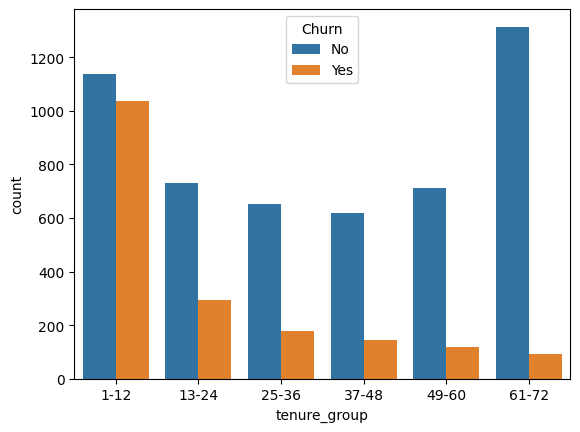

In [ ]:
#Plot Distribution of individual predictors by churn

for i, predictor in enumerate(data_frame.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
  plt.figure(i)
  sns.countplot(data=data_frame , x=predictor , hue='Churn')

Convert the target variable 'Churn' in to Binary numeric variable i.e yes=1 ; no=0.

In [ ]:
#Convertin the predictor variable in a binary numeric variable
data_frame['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data_frame['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
#convert all the categorial variables into dummy variables
data_frame_dummies = pd.get_dummies(data_frame)
data_frame_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Relation between MonthlyCharges and TotalCharges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

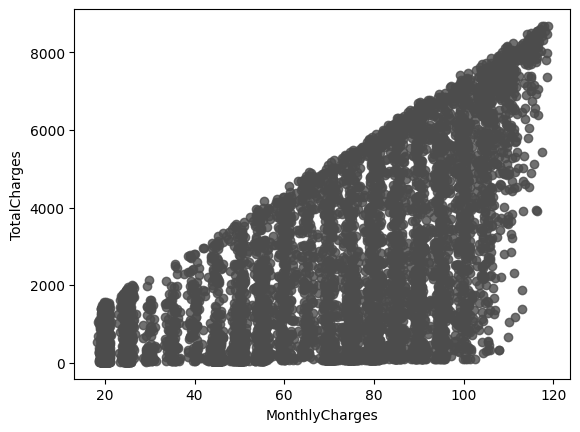

In [ ]:
sns.regplot(data=data_frame_dummies , x='MonthlyCharges', y='TotalCharges' , fit_reg=False , color=".3")

TotalCharges increases as Monthly Charges increases

Text(0.5, 1.0, 'Distribution of Monthly Charges by Churn')

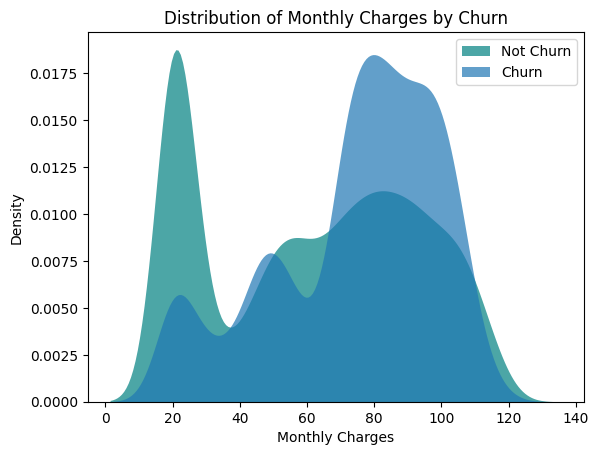

In [ ]:

ax = sns.kdeplot(data_frame_dummies.MonthlyCharges[(data_frame_dummies["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(data_frame_dummies.MonthlyCharges[(data_frame_dummies["Churn"] == 1)], color=None , fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

Text(0.5, 1.0, 'Distribution of Total Charges by Churn')

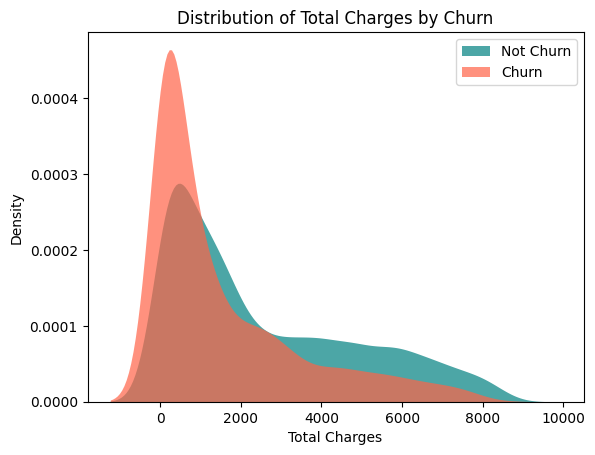

In [ ]:
ax = sns.kdeplot(data_frame_dummies.TotalCharges[(data_frame_dummies["Churn"] == 0)], color='#008080', fill= True, alpha=.7, linewidth=0)
ax = sns.kdeplot(data_frame_dummies.TotalCharges[(data_frame_dummies["Churn"] == 1)], color='#FF6347', fill= True, alpha=.7, linewidth=0)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')

Higher Monthly charge at lower tenure results into lower Total charge. Hence, all the 3 features viz. Higher Monthly charge, Lower tenure , Lower Total charge are linked to High Churn

<Axes: >

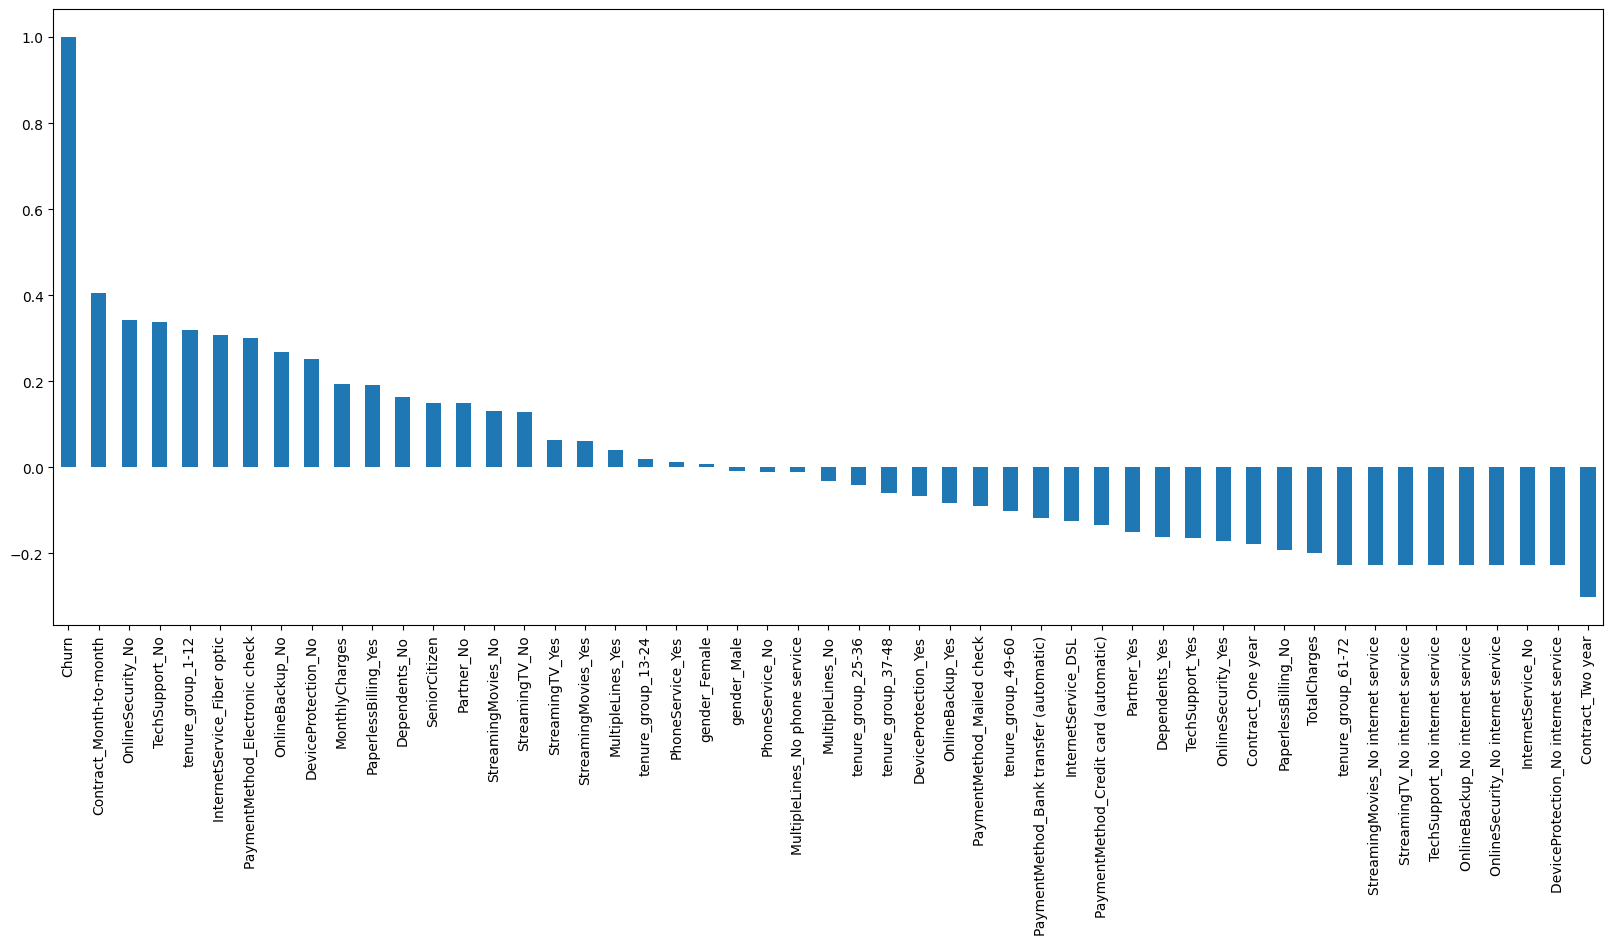

In [ ]:
plt.figure(figsize=(20,8))
data_frame_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)


<ipython-input-127-8c8257b32bab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)
<ipython-input-127-8c8257b32bab>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(frame[feature], color= color)


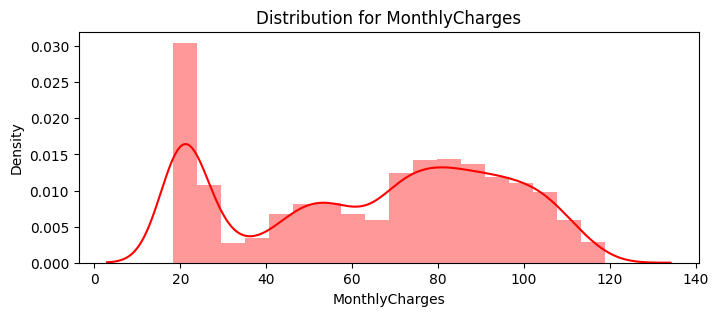

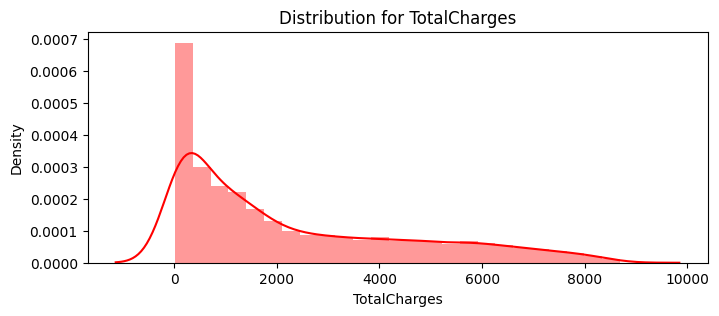

In [ ]:
num_cols = ['MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, data_frame_dummies)

You Can also refer to the Heat Map below

<Axes: >

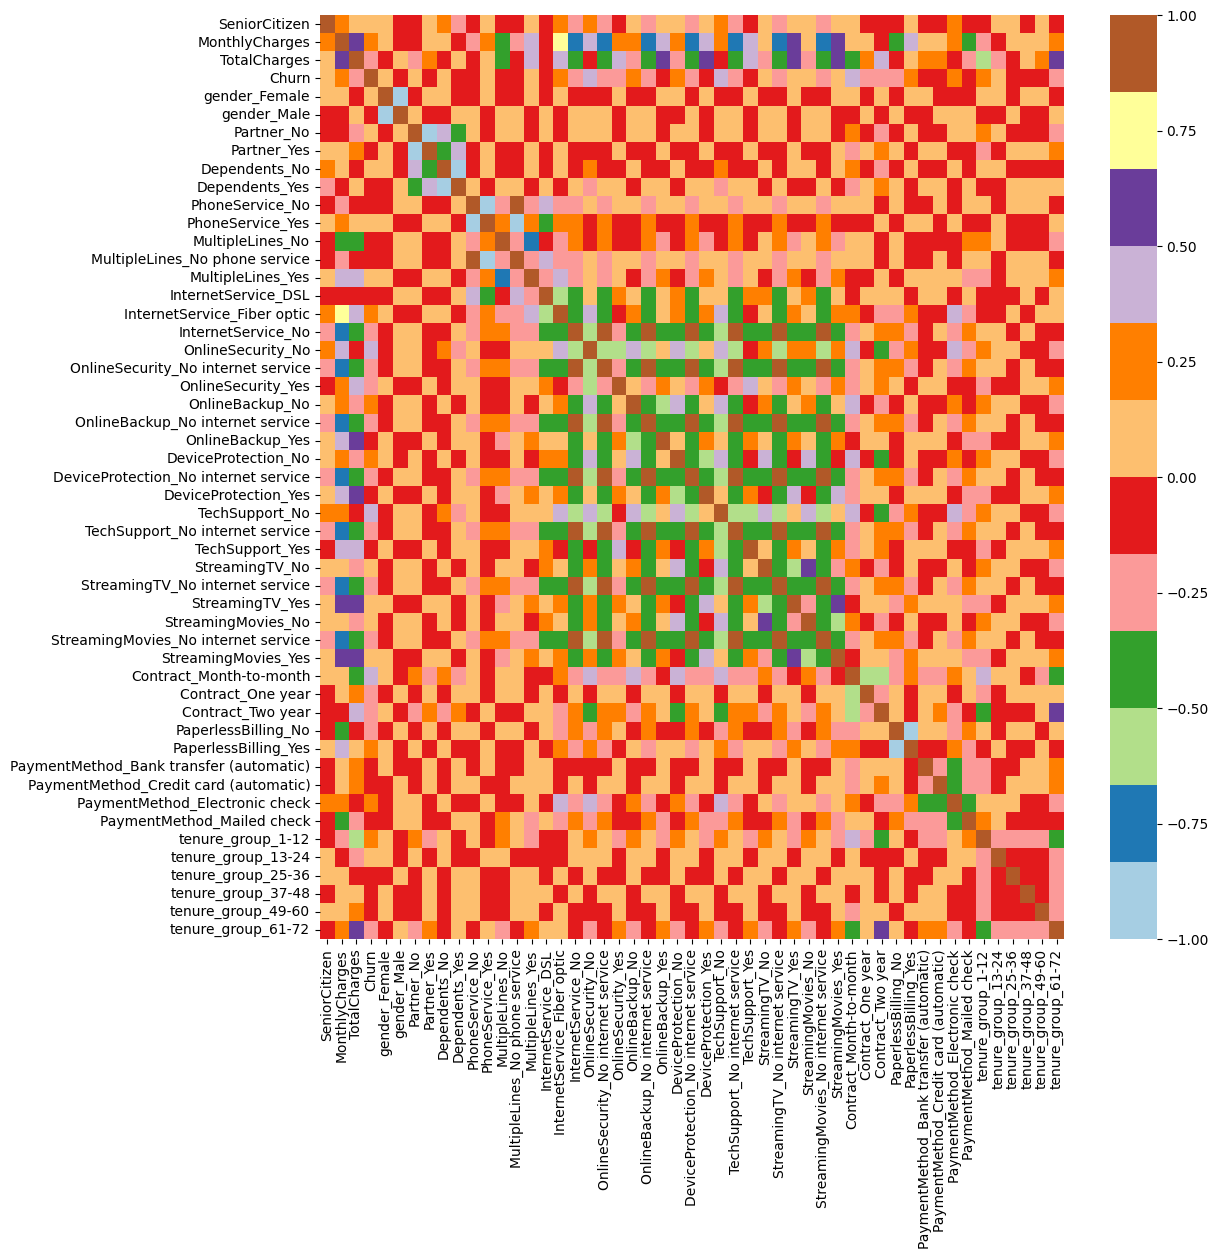

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data_frame_dummies.corr() , cmap="Paired")


In [ ]:
data_frame_dummies.to_csv("/content/drive/My Drive/Colab Notebooks/data_dummies.csv")

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve




In [ ]:
data_frame_dummies.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Creating X & Y variables

In [ ]:
x = data_frame_dummies.drop("Churn" , axis=1)
y = data_frame_dummies['Churn']


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size= 0.2)

## **Decision Tree Classifier**

In [ ]:
model = DecisionTreeClassifier(criterion="gini" , random_state=1000 , max_depth=6 , min_samples_leaf=1)

In [ ]:
model.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=6, random_state=1000)

In [ ]:
y_pred = model.predict(x_test)
print("\n Accuracy score")
print (metrics.accuracy_score(y_test, y_pred))

# Display more comprehensive classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


 Accuracy score
0.7896233120113717

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1009
           1       0.66      0.54      0.59       398

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



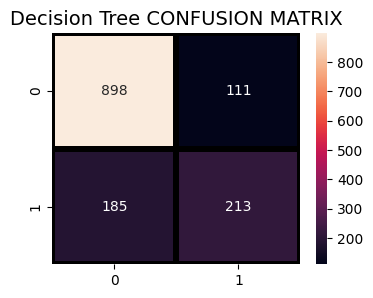

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred ),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Decision Tree CONFUSION MATRIX",fontsize=14)
plt.show()

# **Decision Tree Model with Feature Selection**

In [ ]:

# Create Train & Test Data
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

k_best = SelectKBest(f_classif , k=8)  # Adjust 'k' as needed
x_train_selected = k_best.fit_transform(x_train, y_train)

selected_indices = k_best.get_support(indices=True)

# Get the selected feature names
selected_features = x_train.columns[selected_indices]

x_test_selected = x_test[selected_features]


In [ ]:
# Display the selected features
print("Selected Features:")
print(selected_features)



Selected Features:
Index(['InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No',
       'TechSupport_No', 'Contract_Month-to-month', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'tenure_group_1-12'],
      dtype='object')


In [ ]:
model_f = DecisionTreeClassifier(criterion="gini" , random_state=1000 , max_depth=6 , min_samples_leaf=1)

In [ ]:
model_f.fit(x_train_selected, y_train )

DecisionTreeClassifier(max_depth=6, random_state=1000)

In [ ]:
y_pred_f = model_f.predict(x_test_selected)
print("\n Accuracy score:")
print (metrics.accuracy_score(y_test, y_pred_f))

# Display more comprehensive classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_f))


 Accuracy score:
0.79478672985782

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1580
           1       0.62      0.48      0.54       530

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.78      0.79      0.79      2110



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


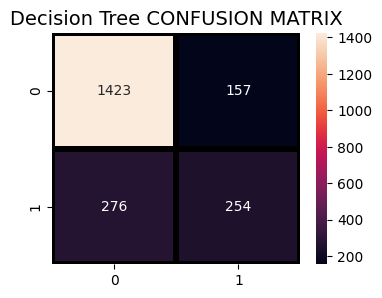

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred_f ),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Decision Tree CONFUSION MATRIX",fontsize=14)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Sensitivity: 0.47924528301886793 Specificity: 0.9006329113924051


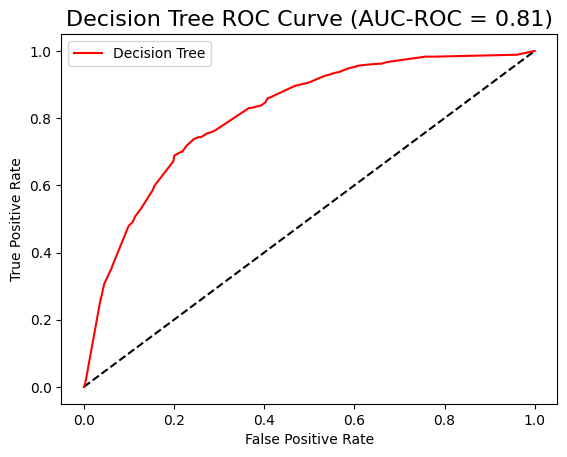

In [ ]:

from sklearn.metrics import roc_auc_score

y_pred_prob = model_f.predict_proba(x_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree', color="r")

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_prob)
def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    return sensitivity, specificity

sensitivity_DecisionTree, specificity_DecisionTree = calculate_sensitivity_specificity(y_test, y_pred_f)
print("Sensitivity:", sensitivity_DecisionTree, "Specificity:", specificity_DecisionTree)


# Add AUC-ROC value to the title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Decision Tree ROC Curve (AUC-ROC = {auc_roc:.2f})', fontsize=16)
plt.legend()
plt.show()

## **Logistic Regression with Feature Selection**

In [ ]:
# We will use the data frame where we had created dummy variables
y = data_frame_dummies['Churn'].values
X = data_frame_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
#It is important to scale the variables in logistic regression so that all of them are within a range of 0 to 1.
# Create Train & Test Data
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

k_best = SelectKBest(f_classif , k=9)  # Adjust 'k' as needed
X_train_selected = k_best.fit_transform(X_train, y_train)

selected_indices = k_best.get_support(indices=True)

# Get the selected feature names
selected_features = X_train.columns[selected_indices]

X_test_selected = X_test[selected_features]




In [ ]:
# Display the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No',
       'DeviceProtection_No', 'TechSupport_No', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'tenure_group_1-12'],
      dtype='object')


In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model_Logistic = LogisticRegression( solver= "liblinear", max_iter=100)
result = model_Logistic.fit(X_train_selected, y_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
y_prediction_logistic = model_Logistic.predict(X_test_selected)
# Print the prediction accuracy
print("\n Accuracy score:")
print (metrics.accuracy_score(y_test, y_prediction_logistic))


# Display more comprehensive classification report
print("\nClassification Report:")
print(classification_report(y_test, y_prediction_logistic))


 Accuracy score:
0.8009478672985783

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1580
           1       0.63      0.50      0.56       530

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


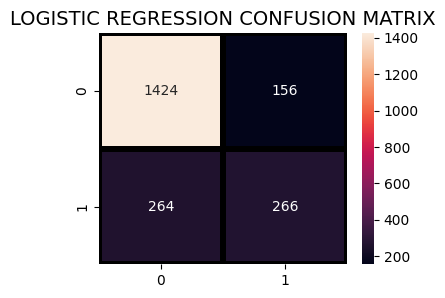

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test ,y_prediction_logistic ),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Sensitivity: 0.5018867924528302 Specificity: 0.9012658227848102


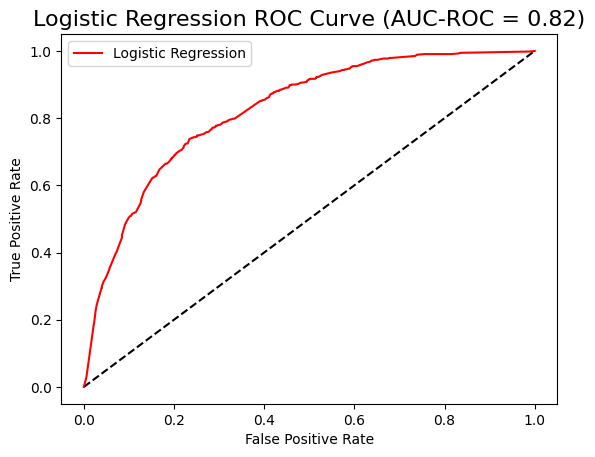

In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_prob = model_Logistic.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression', color="r")

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_prob)
def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    return sensitivity, specificity

sensitivity_logistic, specificity_logistic = calculate_sensitivity_specificity(y_test, y_prediction_logistic)
print("Sensitivity:", sensitivity_logistic, "Specificity:", specificity_logistic)


# Add AUC-ROC value to the title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Logistic Regression ROC Curve (AUC-ROC = {auc_roc:.2f})', fontsize=16)
plt.legend()
plt.show()

Sensitivity (True Positive Rate or Recall): This is the proportion of actual positive cases (churn) that were correctly identified by the model. In this case, approximately 50.19% of the customers who actually churned were correctly identified as such by the model.

Specificity (True Negative Rate): This is the proportion of actual negative cases (no churn) that were correctly identified by the model. In this case, approximately 90.13% of the customers who did not churn were correctly identified as such by the model.

## **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# We will use the data frame where we had created dummy variables
y = data_frame_dummies['Churn'].values
X = data_frame_dummies.drop(columns = ['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1, random_state =50, max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
y_predic = model_rf.predict(X_test)
print("\n Accuracy Score")
print (metrics.accuracy_score(y_test, y_predic))


# Display more comprehensive classification report
print("\nClassification Report:")
print(classification_report(y_test, y_predic))




 Accuracy Score
0.7825159914712153

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.64      0.42      0.51       374

    accuracy                           0.78      1407
   macro avg       0.73      0.67      0.68      1407
weighted avg       0.77      0.78      0.77      1407



Sensitivity: 0.42245989304812837 Specificity: 0.9128751210067764


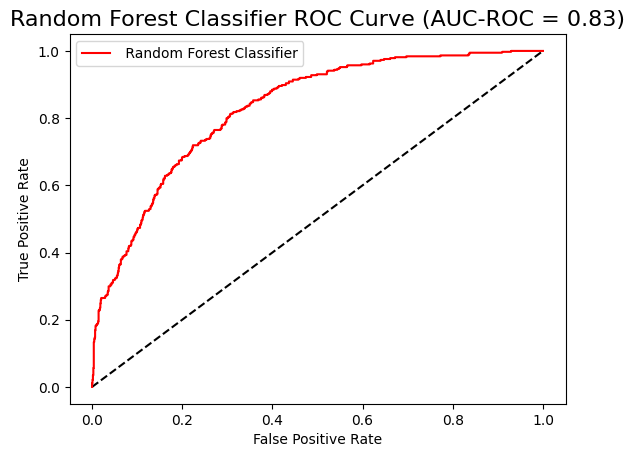

In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_prob = model_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=' Random Forest Classifier', color="r")

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_prob)
def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    return sensitivity, specificity

sensitivity_Randomforest, specificity_Randomforest = calculate_sensitivity_specificity(y_test, y_predic)
print("Sensitivity:", sensitivity_Randomforest, "Specificity:", specificity_Randomforest)


# Add AUC-ROC value to the title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Random Forest Classifier ROC Curve (AUC-ROC = {auc_roc:.2f})', fontsize=16)
plt.legend()
plt.show()

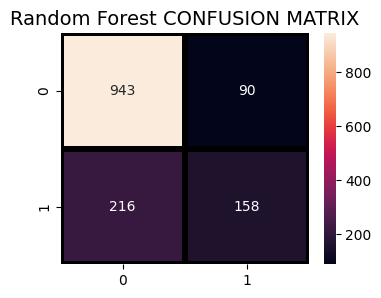

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_predic ),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Random Forest CONFUSION MATRIX",fontsize=14)
plt.show()

<Axes: >

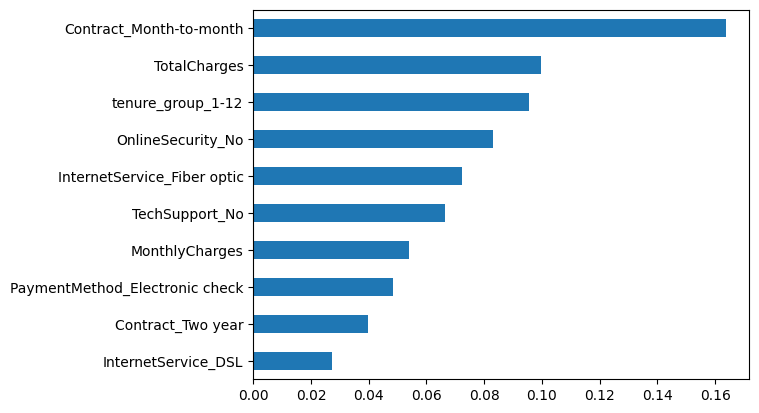

In [ ]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')